In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('MDA.csv')

### Visualização

In [46]:
df['Position']

0         RF
1         ST
2         LW
3         GK
4        RCM
5         LF
6        RCM
7         RS
8        RCB
9         GK
10        ST
11       LCM
12        CB
13       LCM
14       LDM
15        LF
16        ST
17       CAM
18        GK
19        GK
20       CDM
21        LS
22        GK
23        ST
24       LCB
25        RM
26        RM
27       CDM
28       LAM
29        LW
        ... 
18177     ST
18178     GK
18179     CB
18180     GK
18181     RB
18182    CDM
18183     GK
18184     CM
18185    LCM
18186     CM
18187     RB
18188     CM
18189     ST
18190     CM
18191     LB
18192    CDM
18193     RB
18194     GK
18195     CM
18196     CM
18197     CM
18198     GK
18199     CM
18200     ST
18201     RB
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 86 columns):
row ID                      18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null int64
Wage                        18207 non-null int64
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Real Face                   18159 non-null flo

# Estatísticas básicas

Distribuição do pé preferido dos jogadores

4211
13948


<BarContainer object of 2 artists>

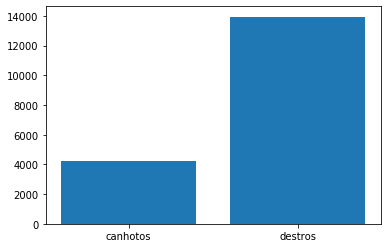

In [5]:
canhotos = df['Preferred Foot'].tolist().count('Left')
print(canhotos)
destros = df['Preferred Foot'].tolist().count('Right')
print(destros)
plt.bar(['canhotos', 'destros'], [canhotos, destros])

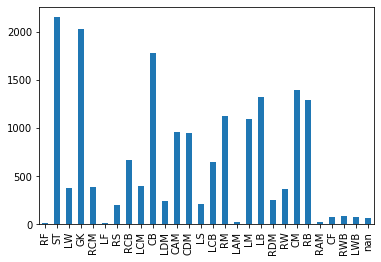

In [6]:
posicoes = df['Position'].unique()
posicoes_cnt = []
for i in posicoes:
    posicoes_cnt.append(df['Position'].tolist().count(i))

df_pos = pd.Series(posicoes_cnt, posicoes)
df_pos.plot.bar()

In [7]:
df.loc[df['Height'] == 182.88]

,row ID,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [11]:
def convertendo_altura(altura):
    if altura == 'nan':
        return 6 * 30.48
    altura = str(altura)
    out = altura.split("'")
    if len(out) != 2:
        return float(altura)
    #print(altura)
    out = float(out[0])*30.48 + float(out[1])*2.54
    return float(out)
#df['Height'].fillna(6*30.48, inplace = True)
df['Height'] = df['Height'].apply(lambda x: convertendo_altura(x))
#df['Height']

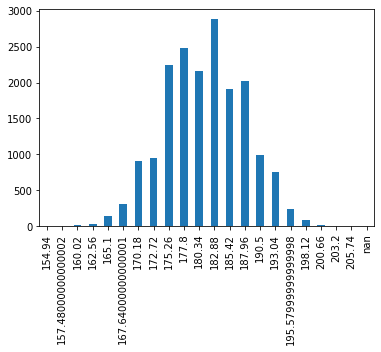

In [9]:
#fazer a distribuicao da altura dos jogadores e depois a media das alturas de acordo com cada posicao
altura = df['Height'].unique()
altura.sort()
altura_cnt = []
for i in altura:
    altura_cnt.append(df['Height'].tolist().count(i))

df_altura = pd.Series(altura_cnt, altura)
df_altura.plot.bar()

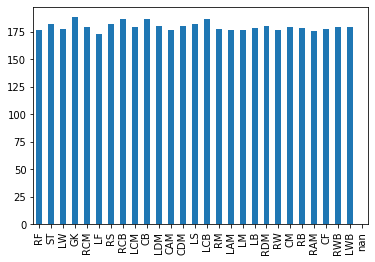

In [10]:
avg_alt_pos = []
#print(posicoes)
#mudar o range do y aqui, por de 160: 185 por ai
for i in posicoes:
    avg_alt_pos.append(df[df['Position'] == i]['Height'].mean())
df_avg_alt_pos = pd.Series(avg_alt_pos, posicoes)
df_avg_alt_pos.plot.bar()  

### Non Trivial Step

In [96]:
def melhor_time(df, tat):
    tat442 = ['GK', 'RB', 'CB', 'CB', 'LB' , 'RM' , 'CM' , 'CM', 'LM', 'ST', 'ST']
    tat433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'RM', 'CM', 'LM', 'LW', 'ST', 'RW']
    time = []
    if tat == 442:
        tat = tat442
    else:
        tat = tat433
    top_5_pos = []
    
    for pos in tat:
        temp = df.where(df['Position'] == pos).dropna(how = 'all')
        temp = temp.sort_values(by = 'Overall', ascending = False)
        temp = temp['Name'].tolist()
        top_5_pos.append(temp[:6])
    
    for i in range(len(top_5_pos)):
        j = 0
        while top_5_pos[i][j] in time:
            j+=1
        time.append(top_5_pos[i][j])
        
    return time

In [98]:
melhor_time(df,433)

['De Gea',
 'Marcelo',
 'D. Godín',
 'S. Umtiti',
 'Azpilicueta',
 'K. Mbappé',
 'Thiago',
 'P. Aubameyang',
 'Neymar Jr',
 'Cristiano Ronaldo',
 'Bernardo Silva']